In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout

In [2]:
tr_df = pd.read_csv('train.csv')

In [3]:
tr_df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [4]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [5]:
tr_df['Date'] = pd.to_datetime(tr_df['Date'])

In [6]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         230090 non-null  datetime64[ns]
 1   store        230090 non-null  int64         
 2   product      230090 non-null  int64         
 3   number_sold  230090 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.0 MB


In [7]:
tr_df['store'].value_counts()

0    32870
1    32870
2    32870
3    32870
4    32870
5    32870
6    32870
Name: store, dtype: int64

In [8]:
tr_df['product'].value_counts()

0    23009
1    23009
2    23009
3    23009
4    23009
5    23009
6    23009
7    23009
8    23009
9    23009
Name: product, dtype: int64

## We will deal with each store indivedually

# Store 1

In [9]:
tr_df.set_index('Date', inplace= True)

In [10]:
tr_df

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808
...,...,...,...
2018-12-27,6,9,890
2018-12-28,6,9,892
2018-12-29,6,9,895


## 1st Product

In [11]:
# Store 1 with product 1
s1p1 = tr_df[(tr_df['store'] == 0) & (tr_df['product'] == 0)]
s1p1

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808
...,...,...,...
2018-12-27,0,0,847
2018-12-28,0,0,854
2018-12-29,0,0,839


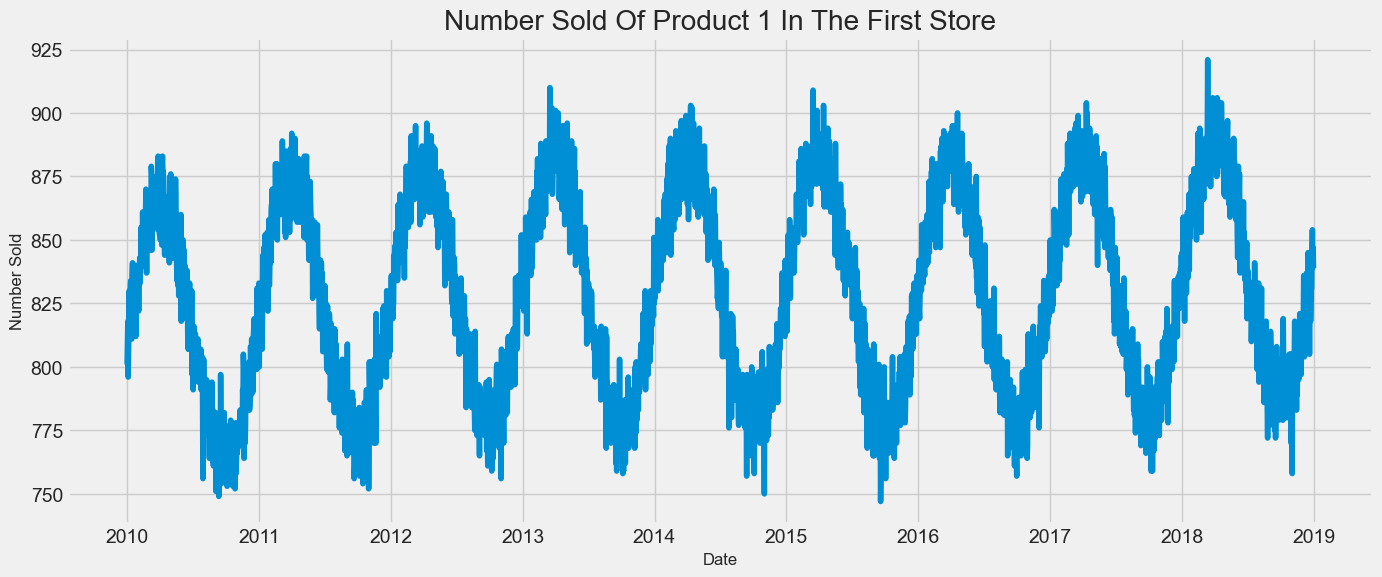

In [12]:
plt.figure(figsize = (15, 6))
plt.plot(s1p1.index, s1p1['number_sold'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('Number Sold', {'fontsize': 12})
plt.title('Number Sold Of Product 1 In The First Store')
plt.show()

_"number_sold"_ is our target

In [13]:
n_cols = 1
dataset = s1p1["number_sold"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(3287, 1)

Let's rescale the values to make it easy for the model

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

Splitting data to train and test data to make training [75% to Train , 25% to Test]

In [15]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 2465 Test Size : 822


In [16]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2465, 1)

LSTM takes a 3D input (num_samples, num_timesteps, num_features), so we will split data according that.

In [17]:
# Creating a Training set with 60 time-steps and 1 target
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.31034483],
       [0.36206897],
       [0.40804598],
       [0.2816092 ],
       [0.35057471],
       [0.37356322],
       [0.47701149],
       [0.37356322],
       [0.40229885],
       [0.48850575],
       [0.5       ],
       [0.45402299],
       [0.43103448],
       [0.36781609],
       [0.51149425],
       [0.54022989],
       [0.40804598],
       [0.45977011],
       [0.43103448],
       [0.40229885],
       [0.5       ],
       [0.44827586],
       [0.42528736],
       [0.53448276],
       [0.37356322],
       [0.50574713],
       [0.49425287],
       [0.49425287],
       [0.49425287],
       [0.53448276],
       [0.45402299],
       [0.50574713],
       [0.43103448],
       [0.49425287],
       [0.50574713],
       [0.55172414],
       [0.49425287],
       [0.52873563],
       [0.52873563],
       [0.62068966],
       [0.53448276],
       [0.5862069 ],
       [0.56321839],
       [0.65517241],
       [0.6091954 ],
       [0.55747126],
       [0.54597701],
  

In [18]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [20]:
x_train.shape , y_train.shape

((2405, 60, 1), (2405, 1))

# Model Structure

In [21]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


I train the model with train data for 100 epoch and batch_size = 32.

To avoid overfitting, I set an _EarlyStoping_ to stop training when "val_loss" has not improved after 10 epochs _(patience = 10).

In [23]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

Epoch 1/100
76/76 [==============================] - 16s 89ms/step - loss: 0.0274 - mean_absolute_error: 0.1058
Epoch 2/100
76/76 [==============================] - 7s 90ms/step - loss: 0.0043 - mean_absolute_error: 0.0519
Epoch 3/100
76/76 [==============================] - 7s 91ms/step - loss: 0.0041 - mean_absolute_error: 0.0511
Epoch 4/100
76/76 [==============================] - 7s 90ms/step - loss: 0.0039 - mean_absolute_error: 0.0496
Epoch 5/100
76/76 [==============================] - 7s 90ms/step - loss: 0.0041 - mean_absolute_error: 0.0509
Epoch 6/100
76/76 [==============================] - 7s 92ms/step - loss: 0.0041 - mean_absolute_error: 0.0514
Epoch 7/100
76/76 [==============================] - 7s 92ms/step - loss: 0.0039 - mean_absolute_error: 0.0499
Epoch 8/100
76/76 [==============================] - 7s 90ms/step - loss: 0.0039 - mean_absolute_error: 0.0498
Epoch 9/100
76/76 [==============================] - 7s 91ms/step - loss: 0.0039 - mean_absolute_error: 0.0501


# Training Evaluation

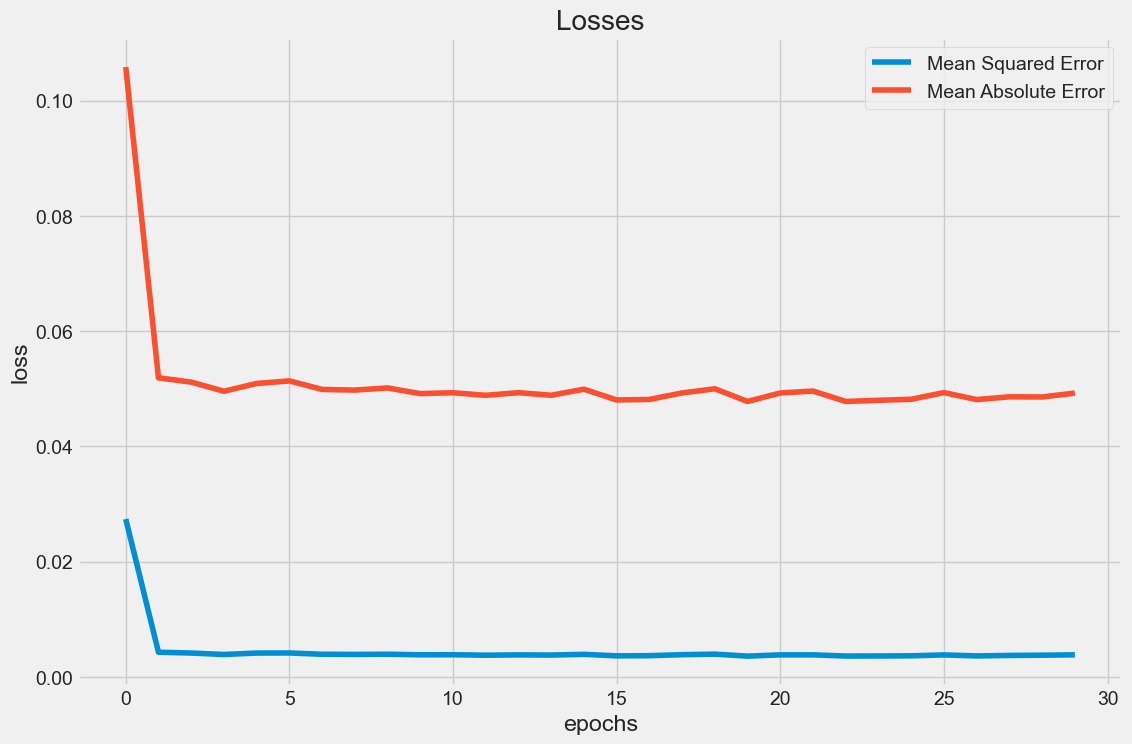

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

Let's split test data to the same format (num_samples, num_timesteps, num_features)

In [25]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [26]:
x_test.shape , y_test.shape

((822, 60, 1), (822, 1))

### Get Prediction

In [27]:
predictions = model.predict(x_test)

In [28]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(822, 1)

# Prediction Evaluation With Root Mean Square Error

In [29]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

1.24

In [30]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,774.952515,771.0
1,773.764893,773.0
2,772.965576,768.0
3,772.219482,770.0
4,771.617920,787.0
...,...,...
817,836.975769,847.0
818,838.173340,854.0
819,840.068359,839.0
820,841.505310,847.0


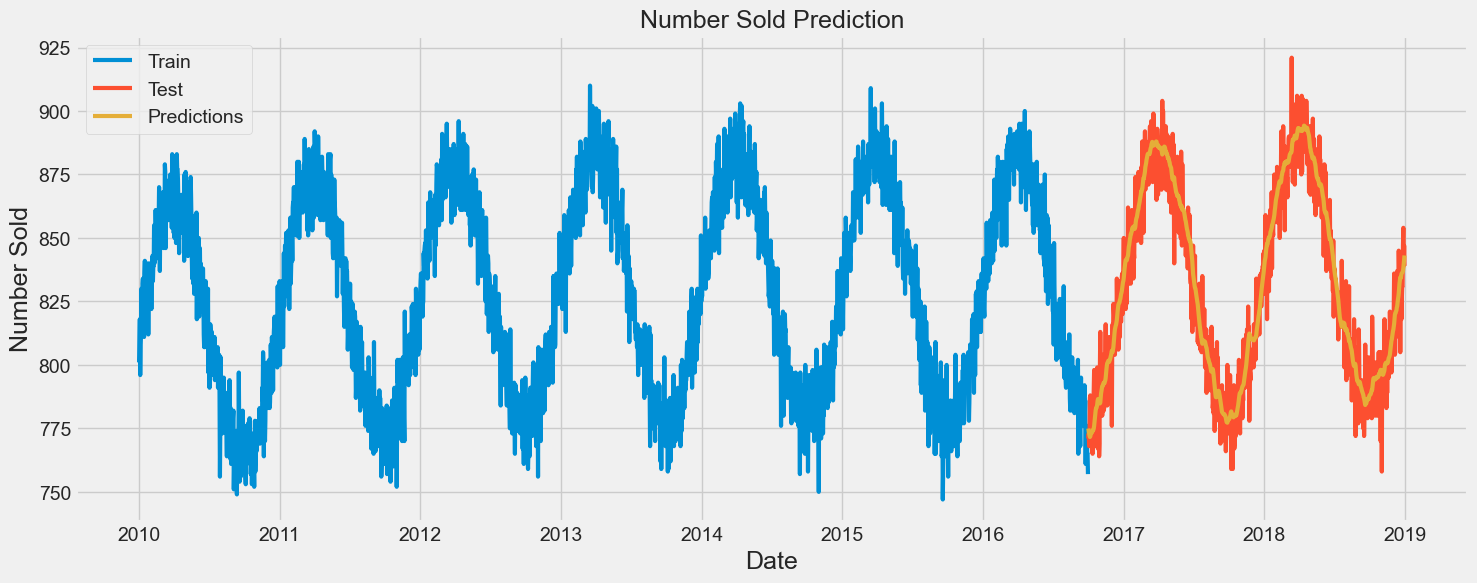

In [31]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Number Sold Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Number Sold', fontsize= 18)
plt.plot(train['number_sold'], linewidth= 3)
plt.plot(test['number_sold'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

# Forecast Next 60 Days

In [32]:
from datetime import timedelta

Function to store next value with old value

In [33]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

create time and forecasted data

In [34]:
future = 30 * 2
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(s1p1.index[-1]) + timedelta(days=i))

[0.55232716]
[0.55232716, 0.560215]
[0.55232716, 0.560215, 0.5673879]
[0.55232716, 0.560215, 0.5673879, 0.5744089]
[0.55232716, 0.560215, 0.5673879, 0.5744089, 0.581212]
[0.55232716, 0.560215, 0.5673879, 0.5744089, 0.581212, 0.5879452]
[0.55232716, 0.560215, 0.5673879, 0.5744089, 0.581212, 0.5879452, 0.5946365]
[0.55232716, 0.560215, 0.5673879, 0.5744089, 0.581212, 0.5879452, 0.5946365, 0.6013084]
[0.55232716, 0.560215, 0.5673879, 0.5744089, 0.581212, 0.5879452, 0.5946365, 0.6013084, 0.6080449]
[0.55232716, 0.560215, 0.5673879, 0.5744089, 0.581212, 0.5879452, 0.5946365, 0.6013084, 0.6080449, 0.61481684]
[0.55232716, 0.560215, 0.5673879, 0.5744089, 0.581212, 0.5879452, 0.5946365, 0.6013084, 0.6080449, 0.61481684, 0.6215159]
[0.55232716, 0.560215, 0.5673879, 0.5744089, 0.581212, 0.5879452, 0.5946365, 0.6013084, 0.6080449, 0.61481684, 0.6215159, 0.6282792]
[0.55232716, 0.560215, 0.5673879, 0.5744089, 0.581212, 0.5879452, 0.5946365, 0.6013084, 0.6080449, 0.61481684, 0.6215159, 0.6282792, 0

In [35]:
time

[Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-02 00:00:00'),
 Timestamp('2019-01-03 00:00:00'),
 Timestamp('2019-01-04 00:00:00'),
 Timestamp('2019-01-05 00:00:00'),
 Timestamp('2019-01-06 00:00:00'),
 Timestamp('2019-01-07 00:00:00'),
 Timestamp('2019-01-08 00:00:00'),
 Timestamp('2019-01-09 00:00:00'),
 Timestamp('2019-01-10 00:00:00'),
 Timestamp('2019-01-11 00:00:00'),
 Timestamp('2019-01-12 00:00:00'),
 Timestamp('2019-01-13 00:00:00'),
 Timestamp('2019-01-14 00:00:00'),
 Timestamp('2019-01-15 00:00:00'),
 Timestamp('2019-01-16 00:00:00'),
 Timestamp('2019-01-17 00:00:00'),
 Timestamp('2019-01-18 00:00:00'),
 Timestamp('2019-01-19 00:00:00'),
 Timestamp('2019-01-20 00:00:00'),
 Timestamp('2019-01-21 00:00:00'),
 Timestamp('2019-01-22 00:00:00'),
 Timestamp('2019-01-23 00:00:00'),
 Timestamp('2019-01-24 00:00:00'),
 Timestamp('2019-01-25 00:00:00'),
 Timestamp('2019-01-26 00:00:00'),
 Timestamp('2019-01-27 00:00:00'),
 Timestamp('2019-01-

create _forecasted dataframe_

In [36]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [37]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

In [38]:
df_result

,Date,Forecasted
0,2018-12-31,843.104858
1,2019-01-01,844.477356
2,2019-01-02,845.725464
3,2019-01-03,846.947144
4,2019-01-04,848.130859
5,2019-01-05,849.302490
6,2019-01-06,850.466797
7,2019-01-07,851.627686
8,2019-01-08,852.799805
9,2019-01-09,853.978149


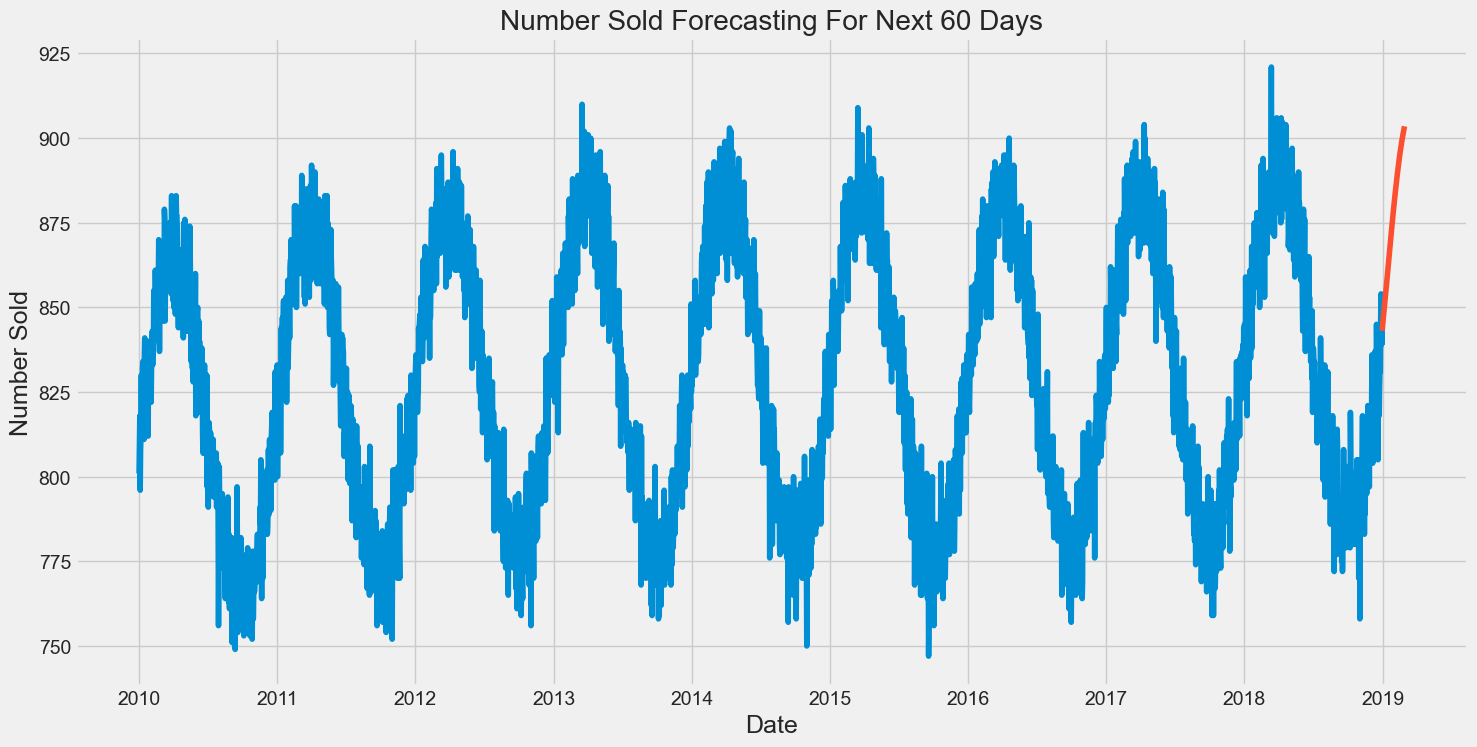

In [39]:
plt.figure(figsize=(16,8))
plt.title('Number Sold Forecasting For Next 60 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number Sold' ,fontsize=18)
plt.plot(s1p1['number_sold'])
plt.plot(df_result.set_index('Date')[['Forecasted']])

## 2nd Product
We will repeat the previous steps but in the data of product 2

In [40]:
# Store 1 with product 2
s1p2 = tr_df[(tr_df['store'] == 0) & (tr_df['product'] == 1)]
s1p2

,store,product,number_sold
Date,,,
2010-01-01,0,1,851
2010-01-02,0,1,843
2010-01-03,0,1,847
2010-01-04,0,1,855
2010-01-05,0,1,866
...,...,...,...
2018-12-27,0,1,708
2018-12-28,0,1,702
2018-12-29,0,1,698


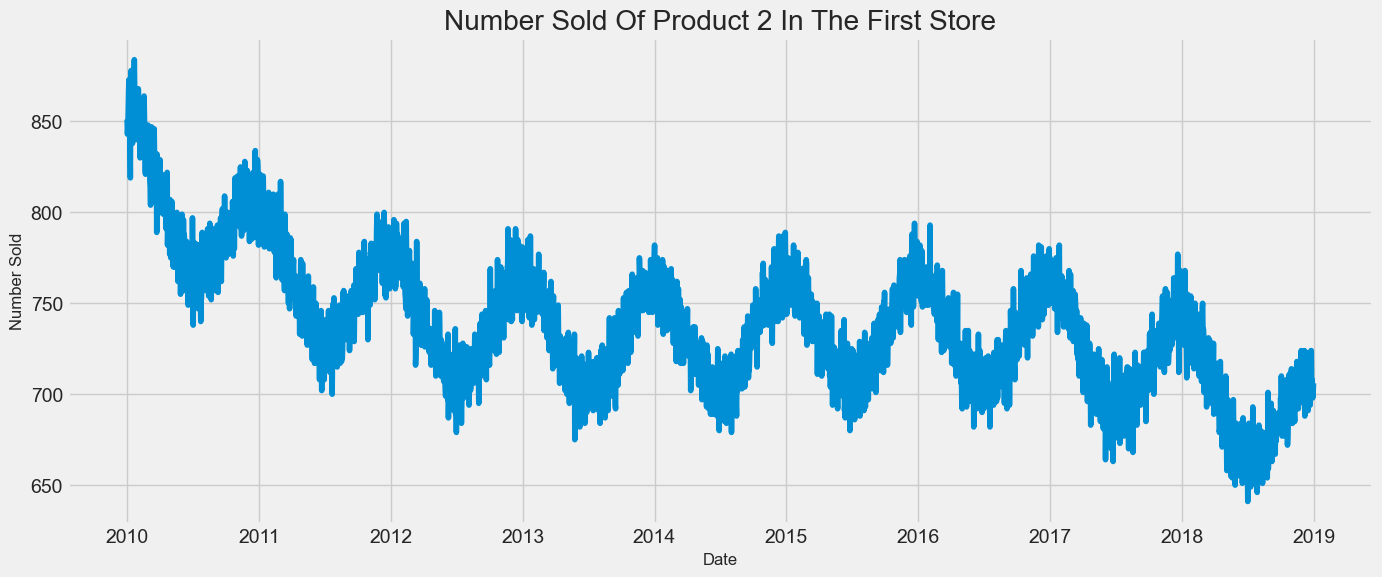

In [41]:
plt.figure(figsize = (15, 6))
plt.plot(s1p2.index, s1p2['number_sold'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('Number Sold', {'fontsize': 12})
plt.title('Number Sold Of Product 2 In The First Store')
plt.show()

In [42]:
n_cols = 1
dataset = s1p2["number_sold"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(3287, 1)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [44]:
# 75% to Train , 25% to Test
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 2465 Test Size : 822


In [45]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2465, 1)

In [46]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.86419753],
       [0.83127572],
       [0.84773663],
       [0.88065844],
       [0.92592593],
       [0.95473251],
       [0.86831276],
       [0.86419753],
       [0.81069959],
       [0.73251029],
       [0.89711934],
       [0.97530864],
       [0.9382716 ],
       [0.88065844],
       [0.87654321],
       [0.81069959],
       [0.85596708],
       [0.86419753],
       [0.86831276],
       [0.92592593],
       [1.        ],
       [0.93415638],
       [0.8436214 ],
       [0.88888889],
       [0.90946502],
       [0.86831276],
       [0.92592593],
       [0.82304527],
       [0.81893004],
       [0.8436214 ],
       [0.82304527],
       [0.93415638],
       [0.90946502],
       [0.86831276],
       [0.84773663],
       [0.84773663],
       [0.77777778],
       [0.85185185],
       [0.79012346],
       [0.89300412],
       [0.86419753],
       [0.86831276],
       [0.781893  ],
       [0.81893004],
       [0.90946502],
       [0.81069959],
       [0.86419753],
  

In [47]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape , y_train.shape

((2405, 60, 1), (2405, 1))

In [48]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

Epoch 1/100
76/76 [==============================] - 18s 90ms/step - loss: 0.0101 - mean_absolute_error: 0.0680
Epoch 2/100
76/76 [==============================] - 7s 89ms/step - loss: 0.0025 - mean_absolute_error: 0.0400
Epoch 3/100
76/76 [==============================] - 7s 90ms/step - loss: 0.0026 - mean_absolute_error: 0.0403
Epoch 4/100
76/76 [==============================] - 7s 92ms/step - loss: 0.0025 - mean_absolute_error: 0.0401
Epoch 5/100
76/76 [==============================] - 7s 94ms/step - loss: 0.0025 - mean_absolute_error: 0.0401
Epoch 6/100
76/76 [==============================] - 7s 91ms/step - loss: 0.0026 - mean_absolute_error: 0.0406
Epoch 7/100
76/76 [==============================] - 7s 90ms/step - loss: 0.0025 - mean_absolute_error: 0.0403
Epoch 8/100
76/76 [==============================] - 7s 90ms/step - loss: 0.0025 - mean_absolute_error: 0.0404
Epoch 9/100
76/76 [==============================] - 7s 94ms/step - loss: 0.0026 - mean_absolute_error: 0.0406


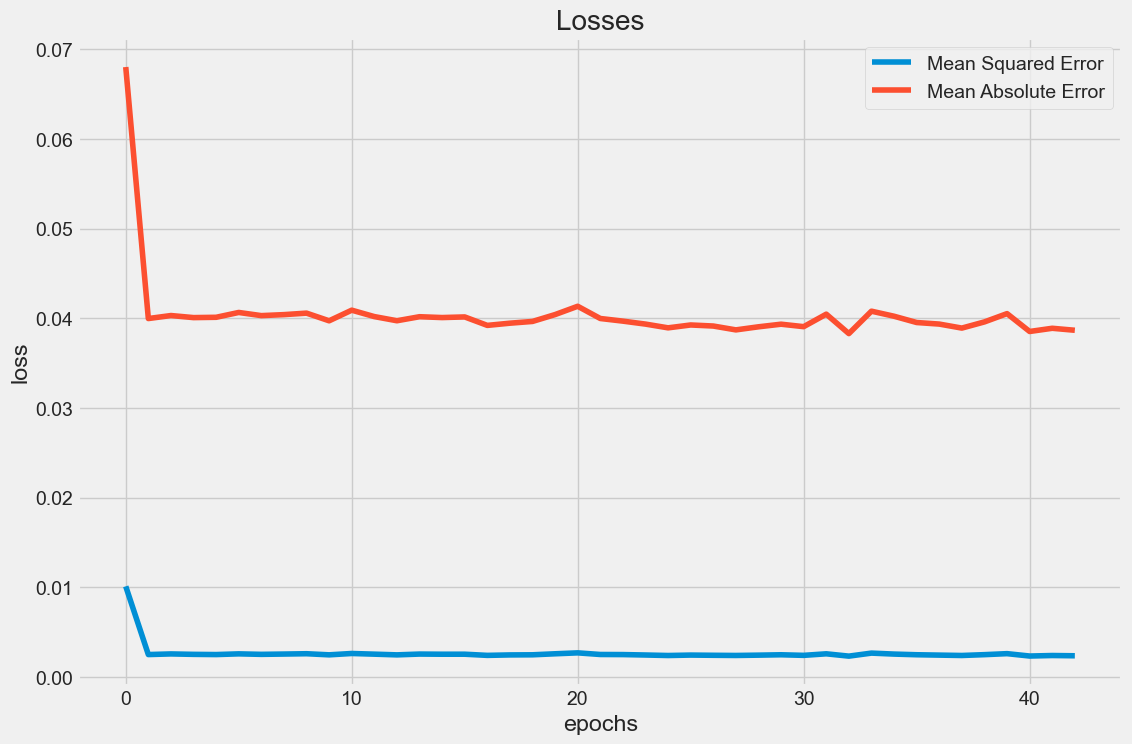

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [51]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

x_test.shape , y_test.shape

((822, 60, 1), (822, 1))

In [52]:
# Get Prediction
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(822, 1)

In [53]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

1.91

In [54]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,730.123535,719.0
1,730.483215,740.0
2,730.992432,730.0
3,731.375366,731.0
4,731.718140,736.0
...,...,...
817,706.192444,708.0
818,706.465820,702.0
819,706.642700,698.0
820,706.655884,700.0


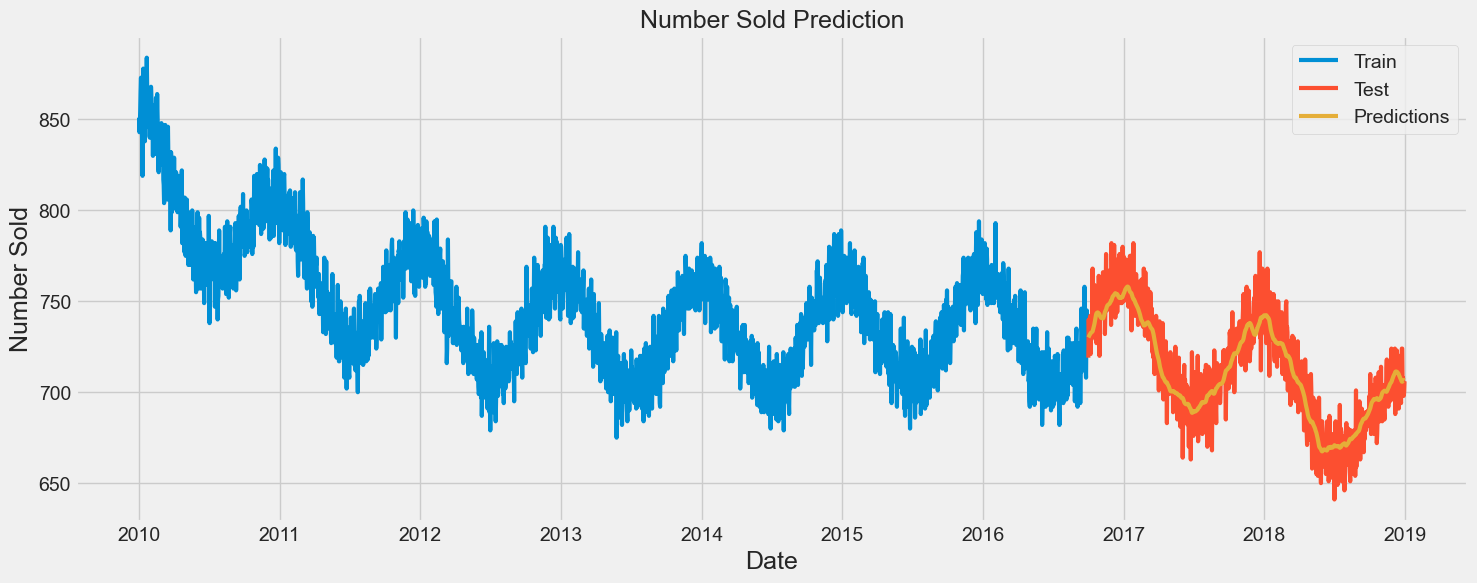

In [55]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Number Sold Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Number Sold', fontsize= 18)
plt.plot(train['number_sold'], linewidth= 3)
plt.plot(test['number_sold'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

In [56]:
from datetime import timedelta

In [57]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [58]:
future = 30 * 2
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(s1p1.index[-1]) + timedelta(days=i))

[0.2696972]
[0.2696972, 0.2691693]
[0.2696972, 0.2691693, 0.2685675]
[0.2696972, 0.2691693, 0.2685675, 0.26797217]
[0.2696972, 0.2691693, 0.2685675, 0.26797217, 0.26739952]
[0.2696972, 0.2691693, 0.2685675, 0.26797217, 0.26739952, 0.26686385]
[0.2696972, 0.2691693, 0.2685675, 0.26797217, 0.26739952, 0.26686385, 0.26634443]
[0.2696972, 0.2691693, 0.2685675, 0.26797217, 0.26739952, 0.26686385, 0.26634443, 0.2658386]
[0.2696972, 0.2691693, 0.2685675, 0.26797217, 0.26739952, 0.26686385, 0.26634443, 0.2658386, 0.2653876]
[0.2696972, 0.2691693, 0.2685675, 0.26797217, 0.26739952, 0.26686385, 0.26634443, 0.2658386, 0.2653876, 0.2650101]
[0.2696972, 0.2691693, 0.2685675, 0.26797217, 0.26739952, 0.26686385, 0.26634443, 0.2658386, 0.2653876, 0.2650101, 0.26466972]
[0.2696972, 0.2691693, 0.2685675, 0.26797217, 0.26739952, 0.26686385, 0.26634443, 0.2658386, 0.2653876, 0.2650101, 0.26466972, 0.26435274]
[0.2696972, 0.2691693, 0.2685675, 0.26797217, 0.26739952, 0.26686385, 0.26634443, 0.2658386, 0.26

In [59]:
time

[Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-02 00:00:00'),
 Timestamp('2019-01-03 00:00:00'),
 Timestamp('2019-01-04 00:00:00'),
 Timestamp('2019-01-05 00:00:00'),
 Timestamp('2019-01-06 00:00:00'),
 Timestamp('2019-01-07 00:00:00'),
 Timestamp('2019-01-08 00:00:00'),
 Timestamp('2019-01-09 00:00:00'),
 Timestamp('2019-01-10 00:00:00'),
 Timestamp('2019-01-11 00:00:00'),
 Timestamp('2019-01-12 00:00:00'),
 Timestamp('2019-01-13 00:00:00'),
 Timestamp('2019-01-14 00:00:00'),
 Timestamp('2019-01-15 00:00:00'),
 Timestamp('2019-01-16 00:00:00'),
 Timestamp('2019-01-17 00:00:00'),
 Timestamp('2019-01-18 00:00:00'),
 Timestamp('2019-01-19 00:00:00'),
 Timestamp('2019-01-20 00:00:00'),
 Timestamp('2019-01-21 00:00:00'),
 Timestamp('2019-01-22 00:00:00'),
 Timestamp('2019-01-23 00:00:00'),
 Timestamp('2019-01-24 00:00:00'),
 Timestamp('2019-01-25 00:00:00'),
 Timestamp('2019-01-26 00:00:00'),
 Timestamp('2019-01-27 00:00:00'),
 Timestamp('2019-01-

In [60]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [61]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"
df_result

,Date,Forecasted
0,2018-12-31,706.536438
1,2019-01-01,706.408142
2,2019-01-02,706.261902
3,2019-01-03,706.117249
4,2019-01-04,705.978088
5,2019-01-05,705.847900
6,2019-01-06,705.721741
7,2019-01-07,705.598755
8,2019-01-08,705.489136
9,2019-01-09,705.397461


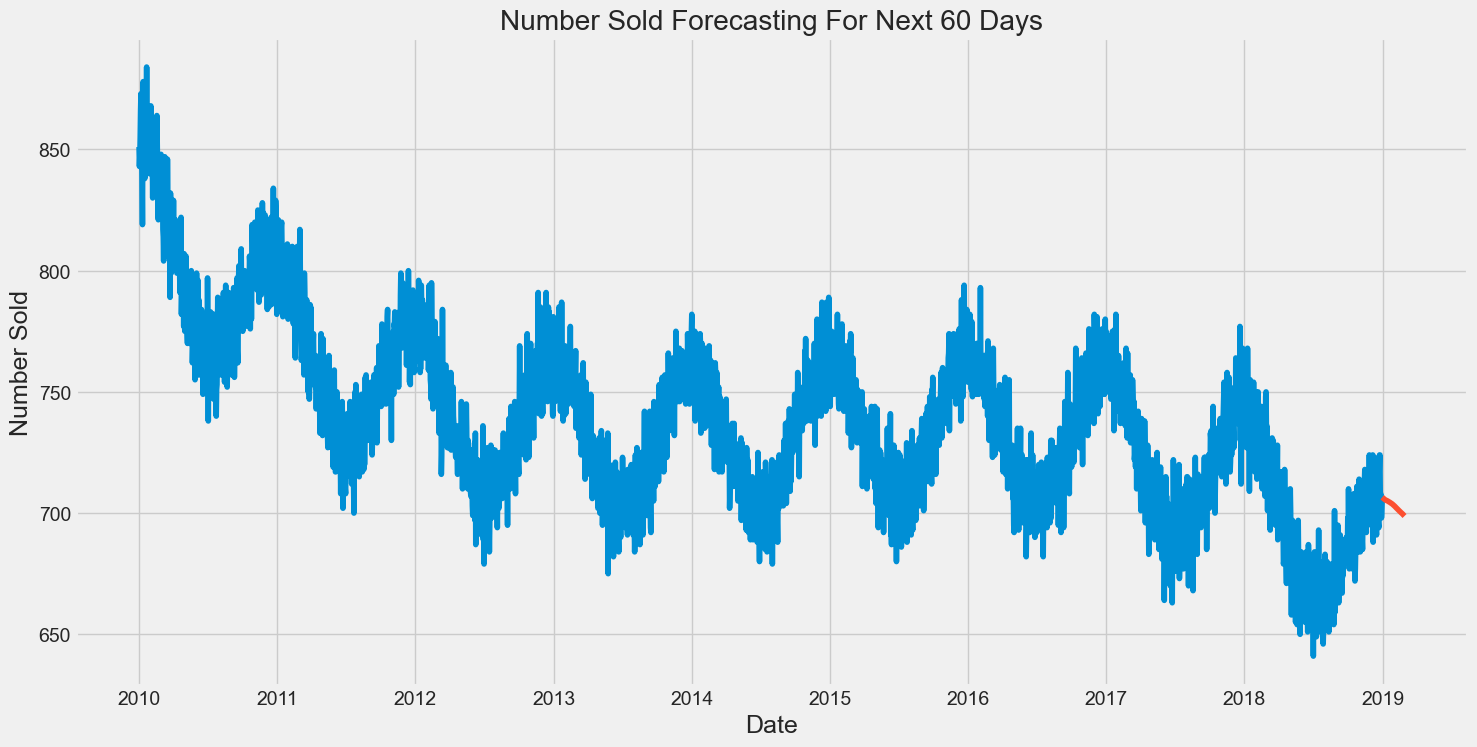

In [62]:
plt.figure(figsize=(16,8))
plt.title('Number Sold Forecasting For Next 60 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number Sold' ,fontsize=18)
plt.plot(s1p2['number_sold'])
plt.plot(df_result.set_index('Date')[['Forecasted']])

The next 60 days is not enough to show a good graph, so you can increase the time, but make sure that more needed days for forecasting, less accuracy will happen.

## 3rd Product

In [63]:
# Store 1 with product 3
s1p3 = tr_df[(tr_df['store'] == 0) & (tr_df['product'] == 2)]
s1p3

,store,product,number_sold
Date,,,
2010-01-01,0,2,893
2010-01-02,0,2,871
2010-01-03,0,2,862
2010-01-04,0,2,887
2010-01-05,0,2,891
...,...,...,...
2018-12-27,0,2,993
2018-12-28,0,2,986
2018-12-29,0,2,956


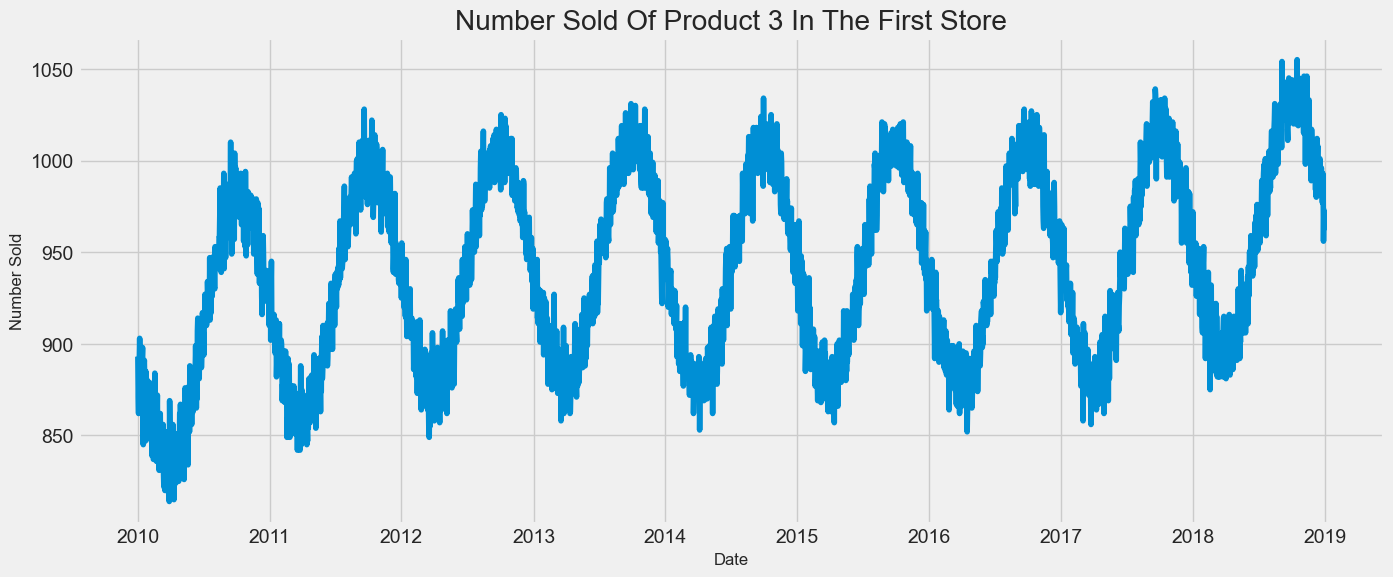

In [66]:
plt.figure(figsize = (15, 6))
plt.plot(s1p3.index, s1p3['number_sold'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('Number Sold', {'fontsize': 12})
plt.title('Number Sold Of Product 3 In The First Store')
plt.show()

In [67]:
n_cols = 1
dataset = s1p3["number_sold"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(3287, 1)

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [69]:
# 75% to Train , 25% to Test
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[0:train_size, :]
train_data.shape

Train Size : 2465 Test Size : 822


(2465, 1)

In [70]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.32780083],
       [0.23651452],
       [0.19917012],
       [0.30290456],
       [0.31950207],
       [0.36929461],
       [0.31950207],
       [0.2780083 ],
       [0.27385892],
       [0.32365145],
       [0.2780083 ],
       [0.25726141],
       [0.32365145],
       [0.34854772],
       [0.22821577],
       [0.12863071],
       [0.24481328],
       [0.30705394],
       [0.31950207],
       [0.26556017],
       [0.26970954],
       [0.13692946],
       [0.29460581],
       [0.17427386],
       [0.2780083 ],
       [0.2406639 ],
       [0.21991701],
       [0.26556017],
       [0.1659751 ],
       [0.19917012],
       [0.17427386],
       [0.17427386],
       [0.26970954],
       [0.22406639],
       [0.18672199],
       [0.14522822],
       [0.14937759],
       [0.13692946],
       [0.17842324],
       [0.10373444],
       [0.19087137],
       [0.15352697],
       [0.1659751 ],
       [0.09543568],
       [0.09543568],
       [0.17842324],
       [0.18257261],
  

In [71]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape , y_train.shape

((2405, 60, 1), (2405, 1))

In [72]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

Epoch 1/100
76/76 [==============================] - 18s 95ms/step - loss: 0.0101 - mean_absolute_error: 0.0710
Epoch 2/100
76/76 [==============================] - 7s 96ms/step - loss: 0.0027 - mean_absolute_error: 0.0418
Epoch 3/100
76/76 [==============================] - 7s 95ms/step - loss: 0.0026 - mean_absolute_error: 0.0413
Epoch 4/100
76/76 [==============================] - 7s 97ms/step - loss: 0.0025 - mean_absolute_error: 0.0401
Epoch 5/100
76/76 [==============================] - 8s 99ms/step - loss: 0.0026 - mean_absolute_error: 0.0407
Epoch 6/100
76/76 [==============================] - 7s 98ms/step - loss: 0.0027 - mean_absolute_error: 0.0417
Epoch 7/100
76/76 [==============================] - 7s 98ms/step - loss: 0.0025 - mean_absolute_error: 0.0397
Epoch 8/100
76/76 [==============================] - 7s 97ms/step - loss: 0.0024 - mean_absolute_error: 0.0392
Epoch 9/100
76/76 [==============================] - 8s 101ms/step - loss: 0.0026 - mean_absolute_error: 0.0406

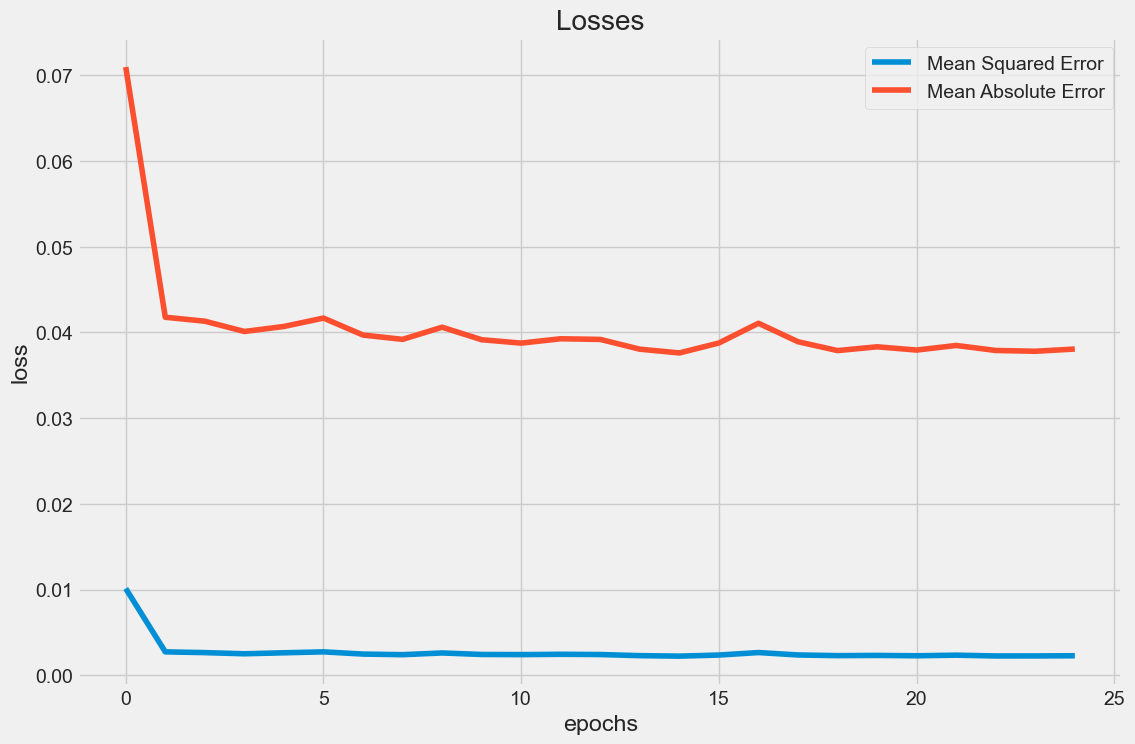

In [74]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [75]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

x_test.shape , y_test.shape

((822, 60, 1), (822, 1))

In [76]:
# Get Prediction
predictions = model.predict(x_test)
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(822, 1)

In [77]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.96

In [78]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,1012.004822,995.0
1,1010.796204,1004.0
2,1009.785889,1006.0
3,1008.999634,1021.0
4,1009.134277,1007.0
...,...,...
817,983.075073,993.0
818,982.755981,986.0
819,982.415771,956.0
820,980.570312,973.0


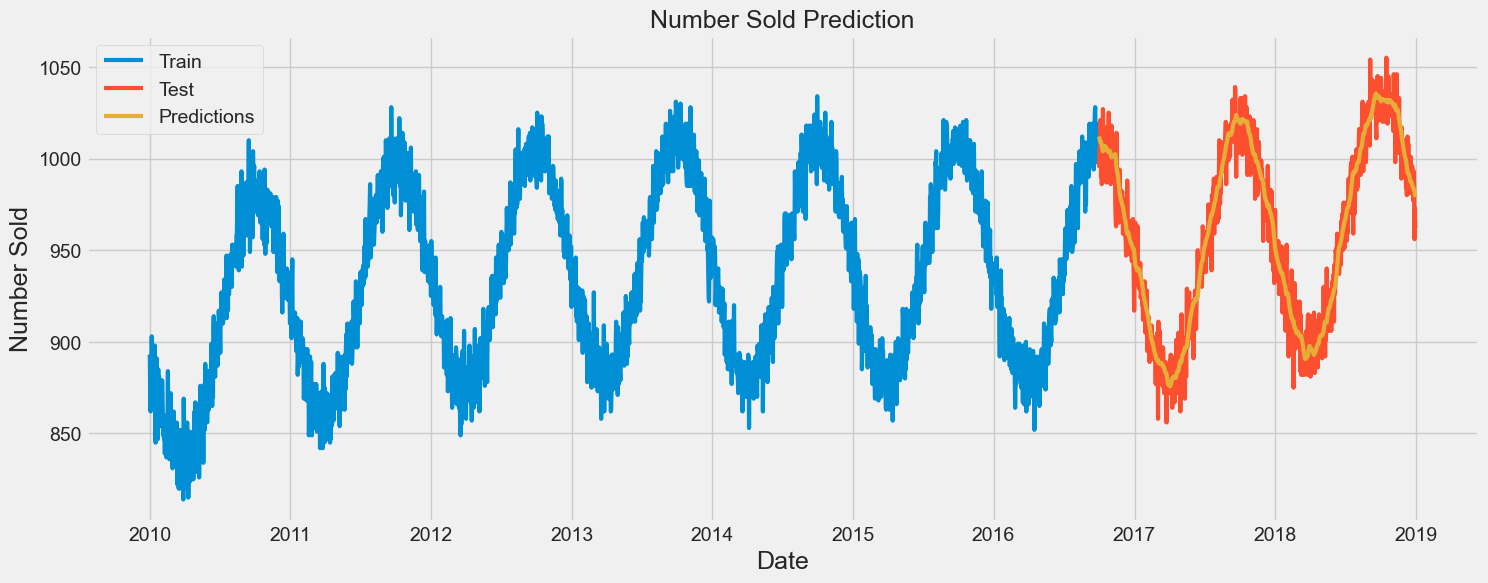

In [79]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Number Sold Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Number Sold', fontsize= 18)
plt.plot(train['number_sold'], linewidth= 3)
plt.plot(test['number_sold'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

In [80]:
from datetime import timedelta

In [81]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [82]:
future = 30 * 2
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(s1p1.index[-1]) + timedelta(days=i))

[0.6842766]
[0.6842766, 0.67886907]
[0.6842766, 0.67886907, 0.67417794]
[0.6842766, 0.67886907, 0.67417794, 0.6699243]
[0.6842766, 0.67886907, 0.67417794, 0.6699243, 0.66592383]
[0.6842766, 0.67886907, 0.67417794, 0.6699243, 0.66592383, 0.6622569]
[0.6842766, 0.67886907, 0.67417794, 0.6699243, 0.66592383, 0.6622569, 0.65867096]
[0.6842766, 0.67886907, 0.67417794, 0.6699243, 0.66592383, 0.6622569, 0.65867096, 0.65515196]
[0.6842766, 0.67886907, 0.67417794, 0.6699243, 0.66592383, 0.6622569, 0.65867096, 0.65515196, 0.65172017]
[0.6842766, 0.67886907, 0.67417794, 0.6699243, 0.66592383, 0.6622569, 0.65867096, 0.65515196, 0.65172017, 0.6482039]
[0.6842766, 0.67886907, 0.67417794, 0.6699243, 0.66592383, 0.6622569, 0.65867096, 0.65515196, 0.65172017, 0.6482039, 0.6448784]
[0.6842766, 0.67886907, 0.67417794, 0.6699243, 0.66592383, 0.6622569, 0.65867096, 0.65515196, 0.65172017, 0.6482039, 0.6448784, 0.64161897]
[0.6842766, 0.67886907, 0.67417794, 0.6699243, 0.66592383, 0.6622569, 0.65867096, 0.6

In [83]:
time

[Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-02 00:00:00'),
 Timestamp('2019-01-03 00:00:00'),
 Timestamp('2019-01-04 00:00:00'),
 Timestamp('2019-01-05 00:00:00'),
 Timestamp('2019-01-06 00:00:00'),
 Timestamp('2019-01-07 00:00:00'),
 Timestamp('2019-01-08 00:00:00'),
 Timestamp('2019-01-09 00:00:00'),
 Timestamp('2019-01-10 00:00:00'),
 Timestamp('2019-01-11 00:00:00'),
 Timestamp('2019-01-12 00:00:00'),
 Timestamp('2019-01-13 00:00:00'),
 Timestamp('2019-01-14 00:00:00'),
 Timestamp('2019-01-15 00:00:00'),
 Timestamp('2019-01-16 00:00:00'),
 Timestamp('2019-01-17 00:00:00'),
 Timestamp('2019-01-18 00:00:00'),
 Timestamp('2019-01-19 00:00:00'),
 Timestamp('2019-01-20 00:00:00'),
 Timestamp('2019-01-21 00:00:00'),
 Timestamp('2019-01-22 00:00:00'),
 Timestamp('2019-01-23 00:00:00'),
 Timestamp('2019-01-24 00:00:00'),
 Timestamp('2019-01-25 00:00:00'),
 Timestamp('2019-01-26 00:00:00'),
 Timestamp('2019-01-27 00:00:00'),
 Timestamp('2019-01-

In [84]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [85]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"
df_result

,Date,Forecasted
0,2018-12-31,978.910706
1,2019-01-01,977.607422
2,2019-01-02,976.476868
3,2019-01-03,975.451782
4,2019-01-04,974.487610
5,2019-01-05,973.603882
6,2019-01-06,972.739746
7,2019-01-07,971.891602
8,2019-01-08,971.064575
9,2019-01-09,970.217163


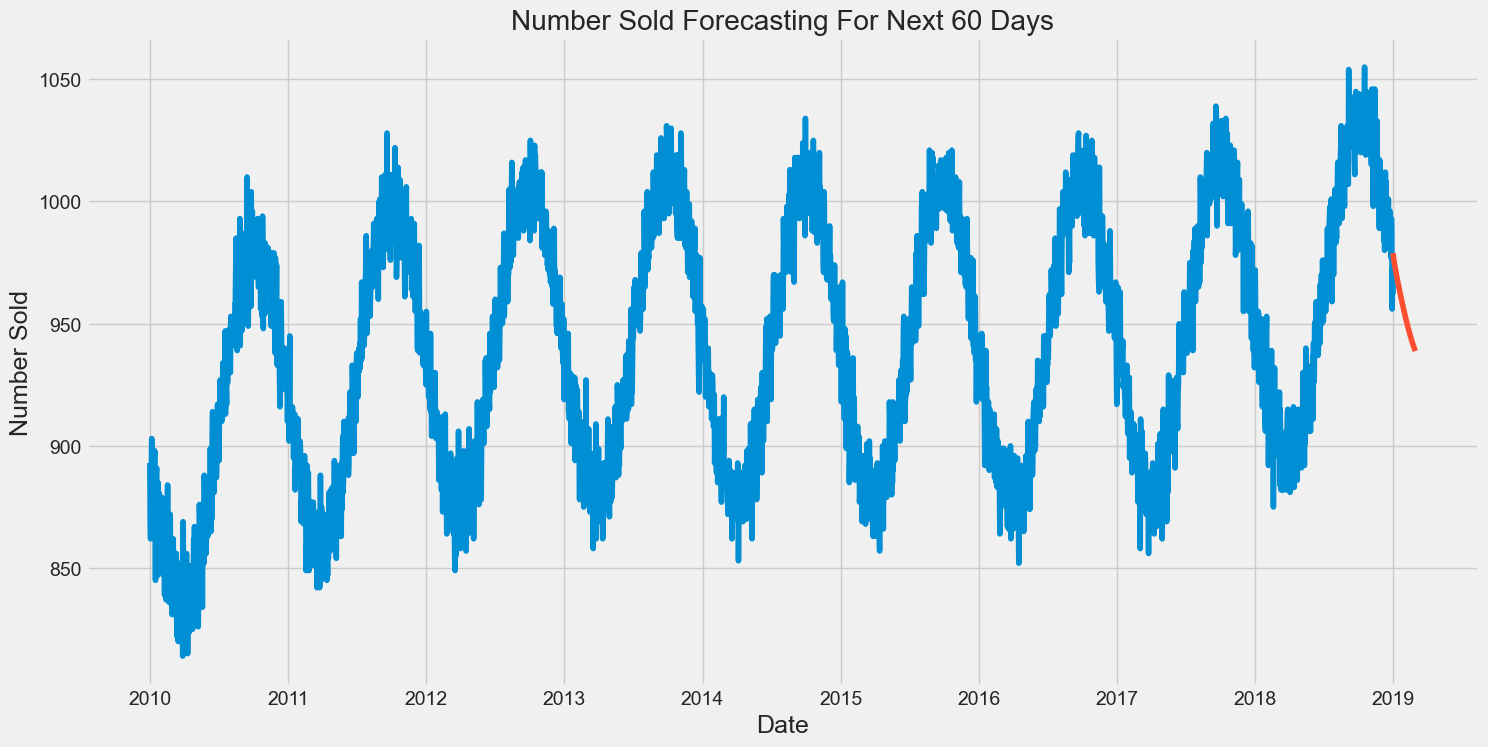

In [86]:
plt.figure(figsize=(16,8))
plt.title('Number Sold Forecasting For Next 60 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number Sold' ,fontsize=18)
plt.plot(s1p3['number_sold'])
plt.plot(df_result.set_index('Date')[['Forecasted']])

## It will take a time to try all the data ! If you want to do that, you won't find any error but take care when you chose the product data..

## If you find this notebook make sense, please upvote it and follow me.
## THANK YOU..